### Prepare a classification model using Naive Bayes for salary data 


In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



In [2]:
Train = pd.read_csv('SalaryData_Train.csv')
Test = pd.read_csv('SalaryData_Test.csv')

In [3]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
Train.shape

(711, 14)

In [6]:
Test.shape

(1602, 14)

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            711 non-null    int64  
 1   workclass      711 non-null    object 
 2   education      711 non-null    object 
 3   educationno    710 non-null    float64
 4   maritalstatus  710 non-null    object 
 5   occupation     710 non-null    object 
 6   relationship   710 non-null    object 
 7   race           710 non-null    object 
 8   sex            710 non-null    object 
 9   capitalgain    710 non-null    float64
 10  capitalloss    710 non-null    float64
 11  hoursperweek   710 non-null    float64
 12  native         710 non-null    object 
 13  Salary         710 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 77.9+ KB


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1602 non-null   int64 
 1   workclass      1602 non-null   object
 2   education      1602 non-null   object
 3   educationno    1602 non-null   int64 
 4   maritalstatus  1602 non-null   object
 5   occupation     1602 non-null   object
 6   relationship   1602 non-null   object
 7   race           1602 non-null   object
 8   sex            1602 non-null   object
 9   capitalgain    1602 non-null   int64 
 10  capitalloss    1602 non-null   int64 
 11  hoursperweek   1602 non-null   int64 
 12  native         1602 non-null   object
 13  Salary         1601 non-null   object
dtypes: int64(5), object(9)
memory usage: 175.3+ KB


In [9]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,711.0,37.451477,12.767150,17.0,28.0,36.0,46.0,90.0
educationno,710.0,10.200000,2.542613,1.0,9.0,10.0,13.0,16.0
capitalgain,710.0,626.801408,2610.401675,0.0,0.0,0.0,0.0,25236.0
capitalloss,710.0,94.459155,413.846780,0.0,0.0,0.0,0.0,2415.0
hoursperweek,710.0,40.271831,11.620985,1.0,40.0,40.0,45.0,98.0


In [10]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1602.0,38.547441,13.171546,17.0,28.0,37.0,47.0,90.0
educationno,1602.0,10.075531,2.696362,1.0,9.0,10.0,13.0,16.0
capitalgain,1602.0,1429.996879,8997.169105,0.0,0.0,0.0,0.0,99999.0
capitalloss,1602.0,88.704120,404.540082,0.0,0.0,0.0,0.0,3004.0
hoursperweek,1602.0,41.226592,11.707788,1.0,40.0,40.0,45.0,99.0


C:\Users\Anup0\AppData\Local\Temp\ipykernel_15056\2207452391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


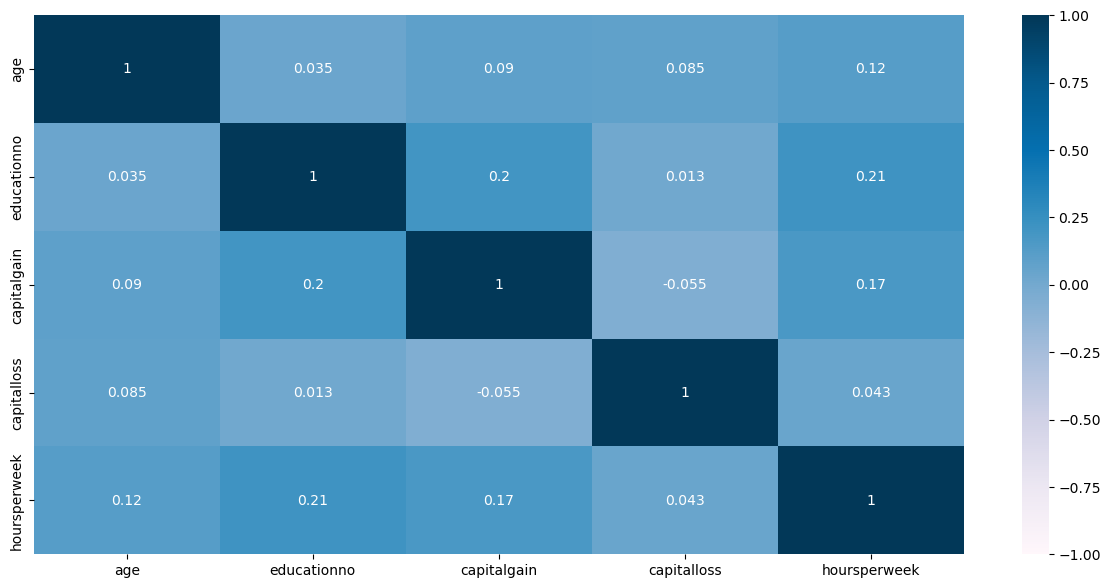

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(Train.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_15056\2767063494.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Test.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


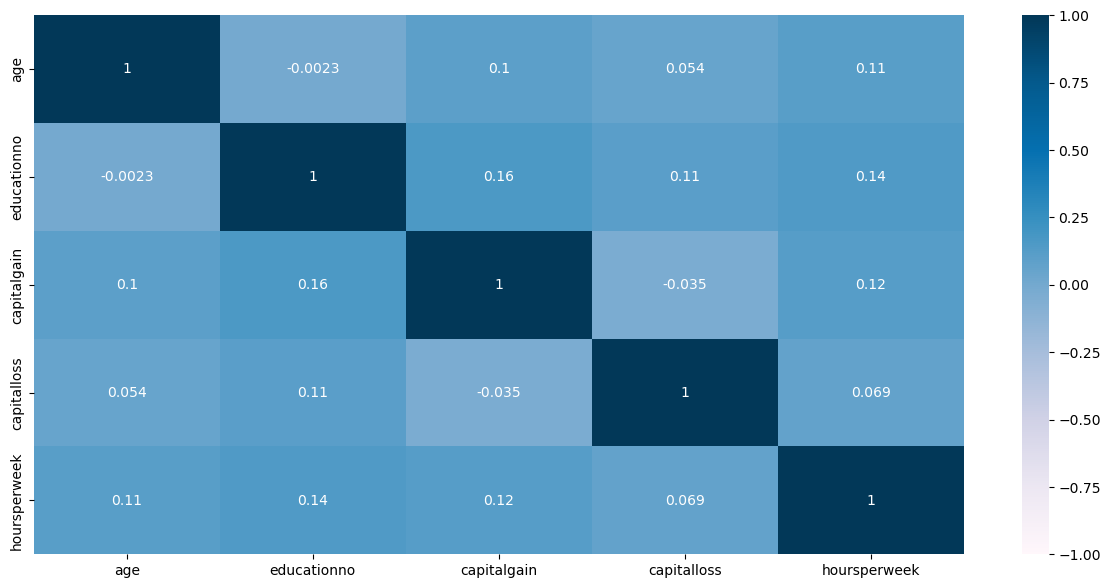

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(Test.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [13]:
Train.Salary.value_counts()

 <=50K    547
 >50K     163
Name: Salary, dtype: int64

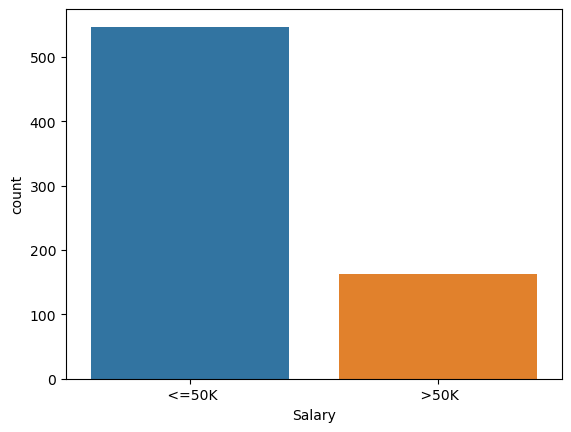

In [14]:
# Checking for class imbalance:
sns.countplot(x = 'Salary',data = Train)
plt.show()

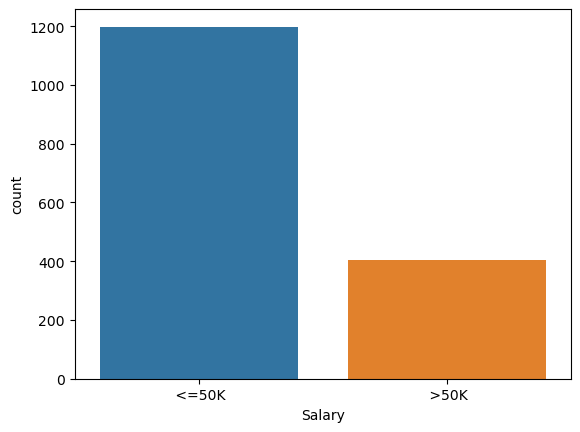

In [15]:
# Checking for class imbalance:
sns.countplot(x = 'Salary',data = Test)
plt.show()

In [16]:
Train.duplicated().sum()

5

In [17]:
Train[Train.duplicated()].head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


In [18]:
Train.drop_duplicates(inplace=True)
Train.reset_index(inplace=True,drop=True)
Train.duplicated().sum()

0

In [19]:
Test.duplicated().sum()

14

In [20]:
Test.drop_duplicates(inplace=True)
Test.reset_index(inplace=True,drop=True)
Test.duplicated().sum()

0

In [21]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [22]:
Train.dropna(inplace=True)
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [23]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [24]:
Test.dropna(inplace=True)
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [25]:
# Let's use cross tab to check distribution:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,57,11
Armed-Forces,1,0
Craft-repair,77,20
Exec-managerial,40,43
Farming-fishing,17,2
Handlers-cleaners,35,1
Machine-op-inspct,34,7
Other-service,84,4
Priv-house-serv,2,0


C:\Users\Anup0\AppData\Local\Temp\ipykernel_15056\3340770129.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=8)


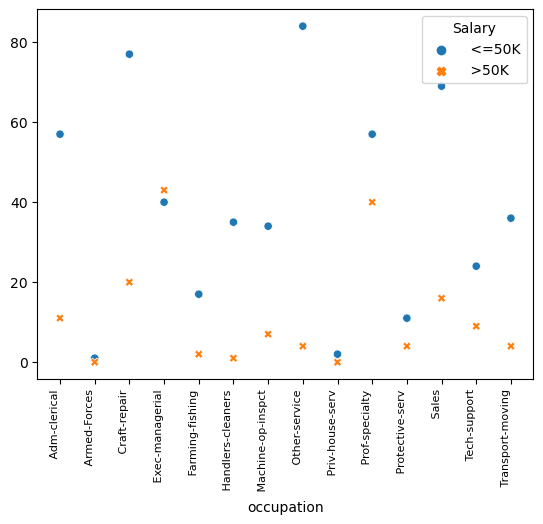

In [26]:
sns.scatterplot(pd.crosstab(Train['occupation'],Train['Salary']))
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

In [27]:
pd.crosstab(Train['relationship'],Train['Salary'])

Salary,<=50K,>50K
relationship,,
Husband,151,116
Not-in-family,184,17
Other-relative,17,1
Own-child,98,1
Unmarried,69,6
Wife,25,20


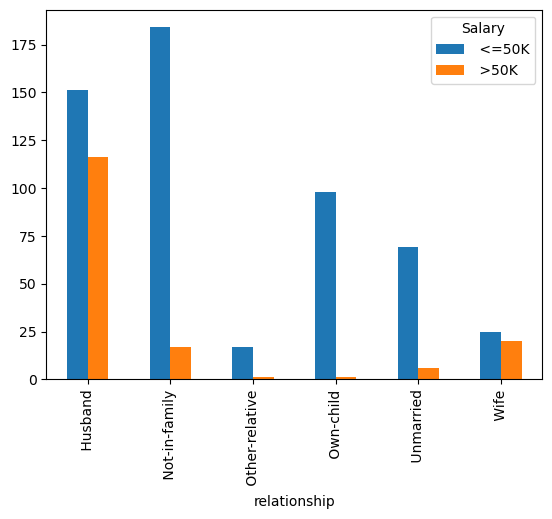

In [28]:
pd.crosstab(Train['relationship'],Train['Salary']).plot(kind='bar')
plt.show()

In [29]:
pd.crosstab(Train['education'],Train['Salary'])

Salary,<=50K,>50K
education,,
10th,11,1
11th,31,0
12th,4,2
1st-4th,3,0
5th-6th,7,0
7th-8th,8,3
9th,13,0
Assoc-acdm,22,6
Assoc-voc,20,9


C:\Users\Anup0\AppData\Local\Temp\ipykernel_15056\4071076438.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=8)


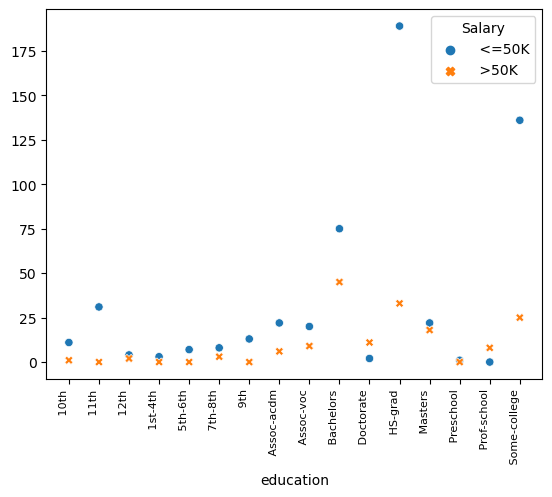

In [30]:
sns.scatterplot(pd.crosstab(Train['education'],Train['Salary']))
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

In [31]:
pd.crosstab(Train['sex'],Train['Salary'])

Salary,<=50K,>50K
sex,,
Female,199,32
Male,345,129


<Axes: xlabel='sex'>

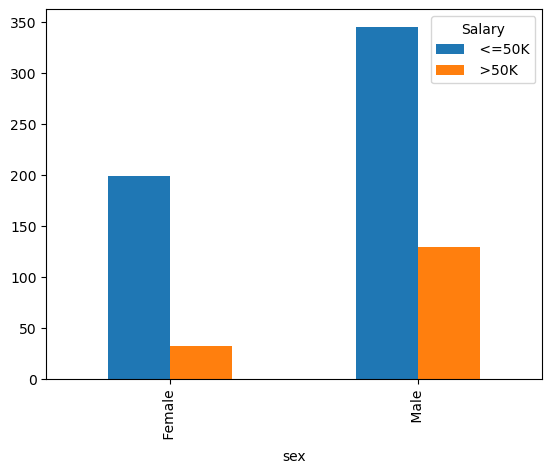

In [32]:
pd.crosstab(Train['sex'],Train['Salary']).plot(kind= 'bar')

In [33]:
Train.drop('educationno',axis=1,inplace=True)
Test.drop('educationno',axis=1,inplace=True)

In [34]:
Obj_Cols = list(Train.describe(include=['object']).columns)

In [35]:
LE = LabelEncoder()
for col in Obj_Cols:
    Train[col] = LE.fit_transform(Train[col])
    Test[col] = LE.fit_transform(Test[col])
Train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174.0,0.0,40.0,23,0
1,50,4,9,2,3,0,4,1,0.0,0.0,13.0,23,0
2,38,2,11,0,5,1,4,1,0.0,0.0,40.0,23,0
3,53,2,1,2,5,0,2,1,0.0,0.0,40.0,23,0
4,28,2,9,2,9,5,2,0,0.0,0.0,40.0,3,0


In [36]:
# Splitting data into features and target also test & train df:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

In [37]:
# Normaizing the data as we are going to perform distance based calculations:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [39]:
from sklearn.naive_bayes import MultinomialNB as MB
M_model=MB()
y_train_pred=M_model.fit(X_train,y_train).predict(X_train)
y_test_pred=M_model.fit(X_train,y_train).predict(X_test)

In [40]:

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7843971631205674
Accuracy Score for Test :  0.7624448645242596 

Confusion_matrix for Train :  
 [[519 127]
 [ 25  34]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       646
           1       0.21      0.58      0.31        59

    accuracy                           0.78       705
   macro avg       0.58      0.69      0.59       705
weighted avg       0.89      0.78      0.83       705
 

Confusion_matrix for Test :  
 [[1117  307]
 [  70   93]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.94      0.78      0.86      1424
           1       0.23      0.57      0.33       163

    accuracy                           0.76      1587
   macro avg       0.59      0.68      0.59      1587
weighted avg       0.87      0.76      0.80      1587
 



In [41]:
## GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
y_train_pred=G_model.fit(X_train,y_train).predict(X_train)
y_test_pred=G_model.fit(X_train,y_train).predict(X_test)

In [42]:

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7716312056737589
Accuracy Score for Test :  0.7561436672967864 

Confusion_matrix for Train :  
 [[495 112]
 [ 49  49]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       607
           1       0.30      0.50      0.38        98

    accuracy                           0.77       705
   macro avg       0.61      0.66      0.62       705
weighted avg       0.83      0.77      0.79       705
 

Confusion_matrix for Test :  
 [[1067  267]
 [ 120  133]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1334
           1       0.33      0.53      0.41       253

    accuracy                           0.76      1587
   macro avg       0.62      0.66      0.63      1587
weighted avg       0.81      0.76      0.78      1587
 

